### Choosing independant variables

1. ***'Charge Amount'*** might actually be part of how Customer Value is calculated, thus it'll be excluded from the independent variables. 

2. ***'Freq. of use'*** This is most likely directly used to calculate Customer Value, the more the customer uses the service, the more he value he has.

3. ***'Status'*** (active/non-active), this actually would've been much more helpful if I had the duration of being active, as Status might help define a Customer's value, for example: "Active for 2 years, high value", "Active for 2 weeks, low value", hence, it'll be removed, along with those two reasons as well: 
    -  It might create noise in our model since all high-value customers must be active, but not all active customers have high value
    -  The relationship might be too deterministic - being non-active almost automatically means lower Customer Value.

4. ***'Age'*** is clearly independent of Cutomer value.

5. ***'Plan_pre-paid'*** is an independent predictor with Charge Amount.

6. ***'Call Failure'*** isn't related to how to define a Customer value, so independent.

7. ***'Complains'*** is an independent predictor compared with Charge Amount

8. ***'Distinct Called Numbers'*** this cannot define a Customer Value so it's independent.


### Final chosen independent variables 

1. ***Age***
2. ***Plan_pre-paid***
3. ***Call Failure***
4. ***Complains***
5. ***Distinct Called Numbers***


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading data...

Training LRM1 model...

Evaluating LRM1 performance...

LRM1 Performance Metrics:
R² Score: 0.1830
Mean Squared Error: 214216.4046
Root Mean Squared Error: 462.8352
Mean Absolute Error: 341.0139


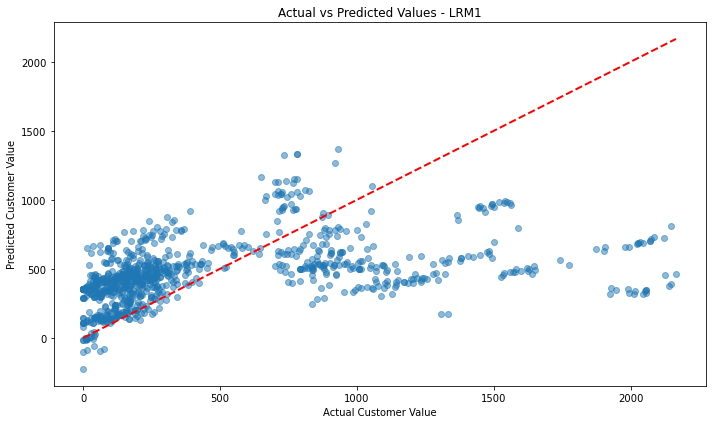

In [2]:
import numpy as np
import pandas as pd
from models.LinearRegressionModel import LinearRegressionModel


def main():
    """
    Implementation of LRM1: predicting Customer Value using all independent attributes
    """
    # Load the prepared data
    print("Loading data...")
    train_df = pd.read_csv('../data/train.csv')
    test_df  = pd.read_csv('../data/test.csv')
   
    independent_features = ['Age', 'Plan_pre-paid', 'Call Failure', 
                          'Complains', 'Distinct Called Numbers']
    
    X_train = train_df[independent_features]
    y_train = train_df['Customer Value']
    X_test = test_df[independent_features]
    y_test = test_df['Customer Value']

    # Create and train LRM1
    print("\nTraining LRM1 model...")
    lrm1 = LinearRegressionModel(model_name="LRM1")
    lrm1.fit(X_train, y_train)
    
    # Evaluate the model
    print("\nEvaluating LRM1 performance...")
    metrics, predictions = lrm1.evaluate(X_test, y_test)
    
    # Print results
    print("\nLRM1 Performance Metrics:")
    print(f"R² Score: {metrics['r2_score']:.4f}")
    print(f"Mean Squared Error: {metrics['mse']:.4f}")
    print(f"Root Mean Squared Error: {metrics['rmse']:.4f}")
    print(f"Mean Absolute Error: {metrics['mae']:.4f}")

    # Plot predictions
    lrm1.plot_predictions(y_test, predictions)

if __name__ == "__main__":
    main()

### Analysing the output

> The performance metrics are really bad.
1. The R² Score of 0.1830 (or about 18.3%) is quite low. This indicates that only about 18.3% of the variance in Customer Value is explained.

2. Customer Value ranges from 0 to about 2165.28, with a mean of 470.97. This means RMSE (462.83) is almost equal to the mean value, which suggests substantial prediction errors.

3. It can be analysed from the plot the model's prediction becomes worse as the Customer Value increases.

### Conclusion
Given this outcome, I've decided to include all the variables I've excluded before, Churn, Charge amount, freq. of use and Status.

Loading data...

Training LRM1 model...

Evaluating LRM1 performance...

LRM1 Performance Metrics:
R² Score: 0.2943
Mean Squared Error: 185037.6297
Root Mean Squared Error: 430.1600
Mean Absolute Error: 319.3866


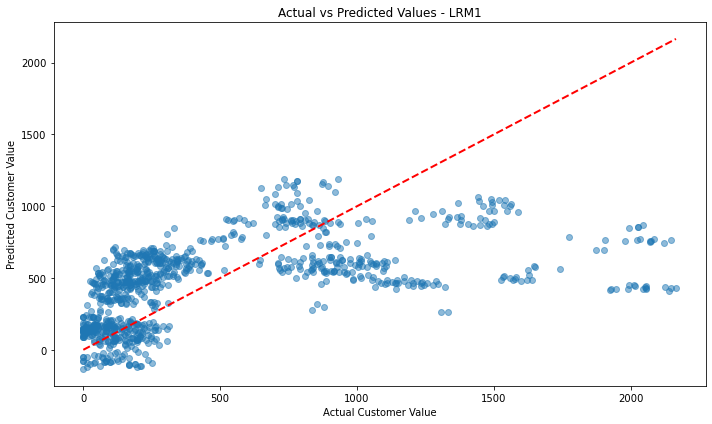

In [4]:

def main():
    """
    Implementation of LRM1: predicting Customer Value using all independent attributes
    """
    # Load the prepared data
    print("Loading data...")
    train_df = pd.read_csv('../data/train.csv')
    test_df  = pd.read_csv('../data/test.csv')
   
    independent_features = ['Age', 'Plan_pre-paid', 'Call Failure', 
                          'Complains', 'Distinct Called Numbers', 'Charge Amount', 
                          'Freq. of use', 'Status']
    
    X_train = train_df[independent_features]
    y_train = train_df['Customer Value']
    X_test = test_df[independent_features]
    y_test = test_df['Customer Value']

    # Create and train LRM1
    print("\nTraining LRM1 model...")
    lrm1 = LinearRegressionModel(model_name="LRM1")
    lrm1.fit(X_train, y_train)
    
    # Evaluate the model
    print("\nEvaluating LRM1 performance...")
    metrics, predictions = lrm1.evaluate(X_test, y_test)
    
    # Print results
    print("\nLRM1 Performance Metrics:")
    print(f"R² Score: {metrics['r2_score']:.4f}")
    print(f"Mean Squared Error: {metrics['mse']:.4f}")
    print(f"Root Mean Squared Error: {metrics['rmse']:.4f}")
    print(f"Mean Absolute Error: {metrics['mae']:.4f}")

    # Plot predictions
    lrm1.plot_predictions(y_test, predictions)

if __name__ == "__main__":
    main()

### Analsyis of new model

1. While the model is still bad for high value customers predictions, the lower value predictions have increased.

2. R² score has improved from 0.1830 to 0.2943, which represents about a 61% improvement compared to the previous R².

3. Mean Squared Error decreased from 214,216 to 185,037 (about 13.6% improvement).

4. RMSE decreased from 462.84 to 430.16 (about 7% improvement)

5. Mean Absolute Error decreased from 341.01 to 319.39 (about 6.3% improvement)


**This leads to an interesting conclusion:**

- the variables initially excluded ('Charge Amount', 'Freq. of use', and 'Status') do contain valuable predictive information. However, the relatively modest improvement suggests that the relationship between these variables and Customer Value might not be purely linear, which is a key assumption of linear regression. 

- It can also be explained becasue the model treats each feature independently, but in reality, features might interact